In [80]:
#import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('user_profiles_for_ads.csv')
df.drop(['User ID', 'Top Interests'], axis=1, inplace=True)
df.head()

,Age,Gender,Location,Language,Education Level,Likes and Reactions,Followed Accounts,Device Usage,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec),Income Level
0,25-34,Female,Suburban,Hindi,Technical,5640,190,Mobile Only,4.5,1.7,0.193,0.067,25,20k-40k
1,65+,Male,Urban,Hindi,PhD,9501,375,Tablet,0.5,7.7,0.114,0.044,68,0-20k
2,45-54,Female,Suburban,Spanish,Technical,4775,187,Mobile Only,4.5,5.6,0.153,0.095,80,60k-80k
3,35-44,Female,Rural,Spanish,PhD,9182,152,Desktop Only,3.1,4.2,0.093,0.061,65,100k+
4,25-34,Female,Urban,English,Technical,6848,371,Mobile Only,2.0,3.8,0.175,0.022,99,20k-40k


In [81]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline  import make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer

#create numeric pipeline
num = make_pipeline(
    SimpleImputer(strategy = 'median'),
    StandardScaler()
)
#create category pipeline
cat = make_pipeline(
    SimpleImputer(strategy = 'most_frequent'),
    OneHotEncoder()
)

#combine 
preprocess = ColumnTransformer([
    ('num', num, make_column_selector(dtype_include=[float,int])),
    ('cat', cat, make_column_selector(dtype_include=object))
])

In [82]:
X = preprocess.fit_transform(df)

In [83]:
X.shape

(1000, 37)

In [84]:
#using all data find optimal number of clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sil =[]
for k in range(3,20):
    kmeans = KMeans(n_clusters = k, random_state=42, n_init='auto')
    kmeans.fit_transform(X)
    sil.append(silhouette_score(X,kmeans.labels_))


C:\Users\natha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\natha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\natha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\natha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

C:\Users\natha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\natha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


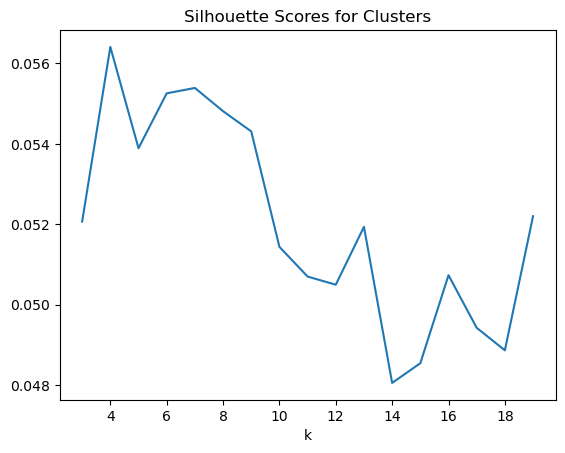

In [85]:
#plot silhouette scores to find optimal k
import seaborn as sns
import matplotlib.pyplot as plt


sns.lineplot(x=range(3,20), y=sil)
plt.title('Silhouette Scores for Clusters')
plt.xlabel('k');

In [86]:
import numpy as np
best_k = 3 + np.argmax(sil)
best_k

4

In [87]:
best_kmeans = KMeans(n_clusters = best_k, n_init = 'auto')
best_kmeans.fit_transform(X)
clusters = best_kmeans.labels_
cluster_centres = best_kmeans.cluster_centers_

C:\Users\natha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [88]:
model = df.copy()
model['Customer Segment']=clusters
model.head()

,Age,Gender,Location,Language,Education Level,Likes and Reactions,Followed Accounts,Device Usage,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec),Income Level,Customer Segment
0,25-34,Female,Suburban,Hindi,Technical,5640,190,Mobile Only,4.5,1.7,0.193,0.067,25,20k-40k,1
1,65+,Male,Urban,Hindi,PhD,9501,375,Tablet,0.5,7.7,0.114,0.044,68,0-20k,3
2,45-54,Female,Suburban,Spanish,Technical,4775,187,Mobile Only,4.5,5.6,0.153,0.095,80,60k-80k,0
3,35-44,Female,Rural,Spanish,PhD,9182,152,Desktop Only,3.1,4.2,0.093,0.061,65,100k+,1
4,25-34,Female,Urban,English,Technical,6848,371,Mobile Only,2.0,3.8,0.175,0.022,99,20k-40k,3


In [89]:
num_features = df.select_dtypes(include=[float,int])
cat_features = df.select_dtypes(include=object)

In [40]:
num_features

,Likes and Reactions,Followed Accounts,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec)
0,5640,190,4.5,1.7,0.193,0.067,25
1,9501,375,0.5,7.7,0.114,0.044,68
2,4775,187,4.5,5.6,0.153,0.095,80
3,9182,152,3.1,4.2,0.093,0.061,65
4,6848,371,2.0,3.8,0.175,0.022,99
...,...,...,...,...,...,...,...
995,3144,74,4.6,5.3,0.097,0.088,154
996,9712,458,4.2,5.6,0.098,0.032,78
997,5736,218,2.1,2.4,0.154,0.070,91
998,2992,260,4.1,2.7,0.031,0.025,147


In [46]:
a = model.groupby('Customer Segment')[num_features.columns].mean()
b = model.groupby('Customer Segment')[cat_features.columns].apply(lambda x: x.mode().iloc[0])
final = pd.concat([a,b],axis=1)
final

,Likes and Reactions,Followed Accounts,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec),Age,Gender,Location,Language,Education Level,Device Usage,Income Level,Top Interests
Customer Segment,,,,,,,,,,,,,,,
0,5445.357798,239.788991,3.463761,2.424312,0.160954,0.047564,67.926606,45-54,Male,Suburban,English,Bachelor,Mobile + Desktop,60k-80k,Pet Care
1,3564.967105,167.796053,1.442105,3.797368,0.118336,0.038579,123.578947,25-34,Male,Urban,Hindi,High School,Mobile Only,0-20k,Investing and Finance
2,2997.304124,294.134021,3.827835,5.679897,0.138299,0.052515,125.711340,25-34,Female,Rural,Mandarin,Master,Mobile Only,80k-100k,Investing and Finance
3,6209.270042,382.206751,1.816878,5.065401,0.117654,0.056954,80.282700,25-34,Female,Urban,English,High School,Mobile + Desktop,60k-80k,Digital Marketing
4,6105.763819,130.723618,3.065327,5.997487,0.088161,0.049678,72.452261,25-34,Male,Rural,Mandarin,Master,Desktop Only,40k-60k,Gaming


In [57]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2, random_state =42)
Xt = pca.fit_transform(X.toarray())
kmeans_pca = KMeans(n_clusters = best_k, n_init='auto')
kmeans_pca.fit_transform(Xt)
clusters = kmeans_pca.labels_
cc = kmeans_pca.cluster_centers_

C:\Users\natha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [58]:
cc

array([[ 0.09797469, -1.41282409],
       [ 1.38690515,  0.16654663],
       [-1.46829216, -0.04159224],
       [-0.1105402 ,  1.4562185 ],
       [-0.04201103,  0.01065063]])

''

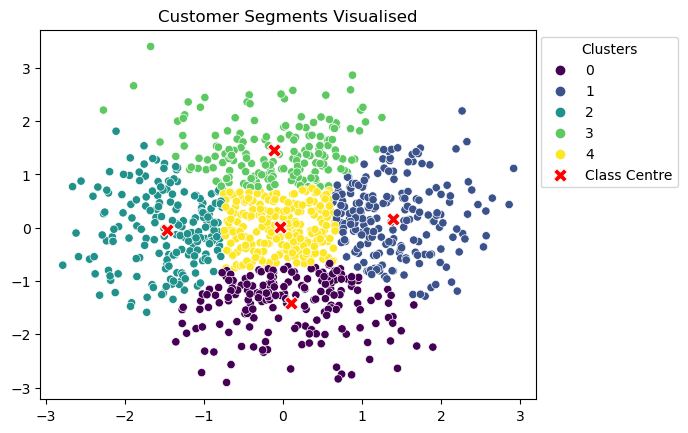

In [77]:
sns.scatterplot(x = Xt[:,0], y = Xt[:,1], hue= clusters, palette='viridis')
sns.scatterplot(x = cc[:,0], y = cc[:,1], s = 100, marker='X', c='r', label = 'Class Centre')
plt.legend(bbox_to_anchor=(1.3, 1), loc = 'upper right', title='Clusters')
plt.title('Customer Segments Visualised')
;